In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [26]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df.shape

(5572, 5)

In [11]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Processing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
# as last 3 columns are mostly NULL, therefore it is better to drop them
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [14]:
df.sample(5)

,v1,v2
1925,ham,We don call like &lt;#&gt; times oh. No give...
859,ham,Did he just say somebody is named tampa
3517,ham,Are you willing to go for apps class.
5155,ham,MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WIT...
3465,ham,"Actually fuck that, just do whatever, do find ..."


In [16]:
# renaming the columns for better understanding
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
4275,ham,Can you please send me my aunty's number
563,spam,GENT! We are trying to contact you. Last weeke...
2116,ham,"It's that time of the week again, ryan"
4832,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ..."
5077,spam,Do you want a New Nokia 3510i colour phone Del...


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
df['target'] = encoder.fit_transform(df['target'])

In [24]:
# checking for any missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
# check for duplicate values
df.duplicated().sum()

403

In [27]:
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

## 2. EDA

In [31]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

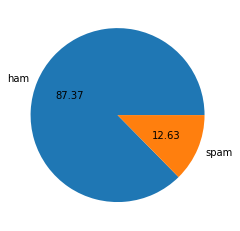

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [33]:
# Data is imbalanced

In [34]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 6.4 MB/s eta 0:00:00
     ------------------------------------- 268.0/268.0 kB 16.1 MB/s eta 0:00:00


In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
# counting number of characters in each message
df['num_characters'] = df['text'].apply(len)

C:\Users\akshi\AppData\Local\Temp\ipykernel_4948\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [39]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# counting number of words in each message
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\akshi\AppData\Local\Temp\ipykernel_4948\639711285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
# counting number of sentences in each message
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\akshi\AppData\Local\Temp\ipykernel_4948\1209189594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [49]:
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [50]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

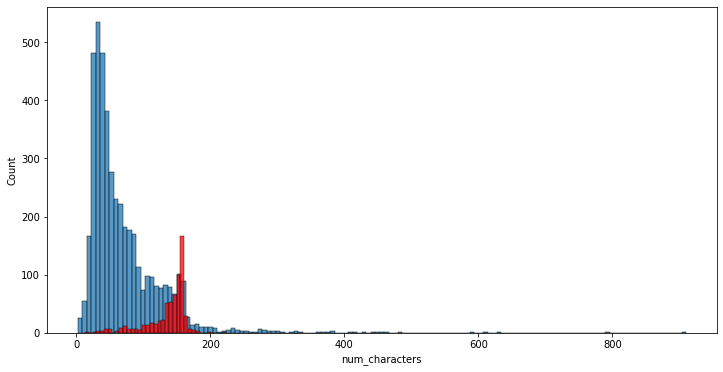

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

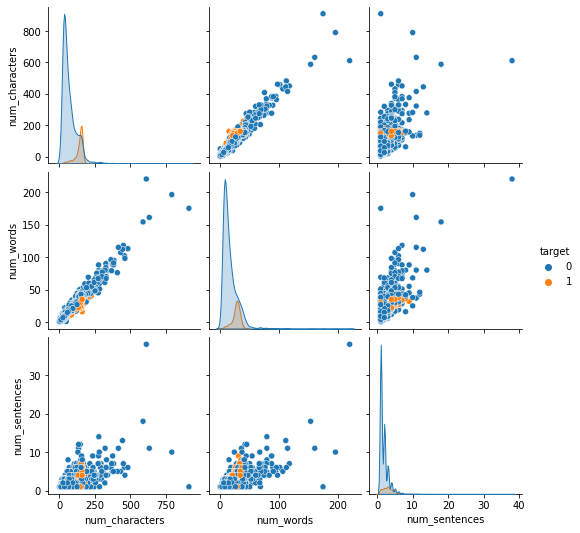

In [55]:
sns.pairplot(df, hue='target')

C:\Users\akshi\AppData\Local\Temp\ipykernel_4948\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot:>

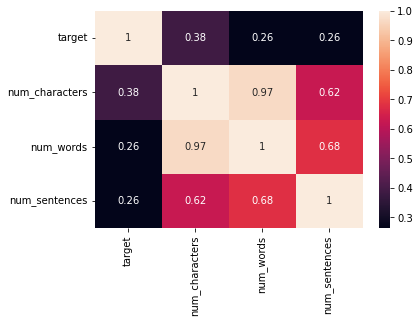

In [57]:
sns.heatmap(df.corr(), annot = True)

## 3. Data Preprocessing
* Lower case 
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [68]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
            
    return " ".join(y)

In [61]:
 nltk.download('stopwords')
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [63]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
transform_text('Hi how are you AKSHITA?')

'hi akshita'

In [67]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [70]:
transform_text('I loved the lecture on Operating Systems. Did you?')

'love lectur oper system'

In [72]:
df['transformed_text']= df['text'].apply(transform_text)

C:\Users\akshi\AppData\Local\Temp\ipykernel_4948\3705489216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']= df['text'].apply(transform_text)


In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [92]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
        for word in msg.split():
            spam_corpus.append(word)

In [93]:
len(spam_corpus)

9930

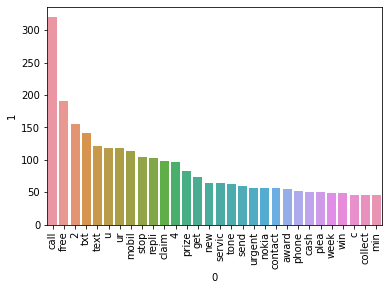

In [99]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [100]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
        for word in msg.split():
            ham_corpus.append(word)

In [102]:
len(ham_corpus)

35296

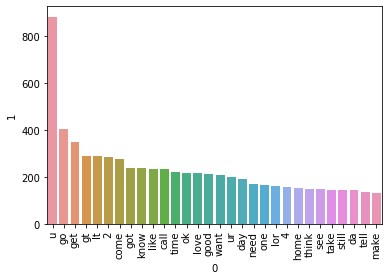

In [101]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y =pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building 

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [202]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [172]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
# X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))

In [203]:
X.shape

(5169, 3000)

In [204]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [205]:
y = df['target'].values

In [206]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [209]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [243]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [211]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8723404255319149
[[790 106]
 [ 26 112]]
0.5137614678899083


In [212]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [213]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [214]:
# tfidf ---> mnb

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [216]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [217]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [218]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [219]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [220]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9264990328820116
Precision -  0.81
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9611650485436893
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9557522123893806
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [221]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [222]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.971954,1.000000
5,RF,0.973888,0.982609
8,ETC,0.978723,0.975410
0,SVC,0.976789,0.975000
4,LR,0.958414,0.961165
6,AdaBoost,0.966151,0.955752
9,GBDT,0.949710,0.938776
10,xgb,0.967118,0.933333
7,BgC,0.956480,0.860465


In [223]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [224]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.976789
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.966151
7,GBDT,Accuracy,0.949710
8,xgb,Accuracy,0.967118
9,BgC,Accuracy,0.956480


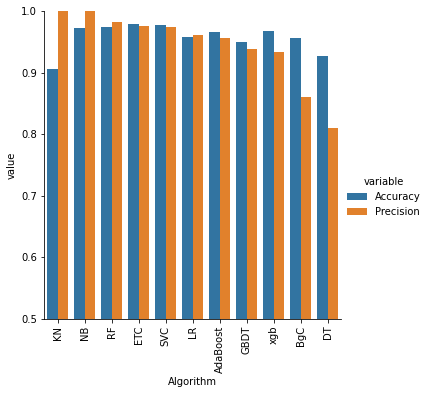

In [225]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [226]:
# model improvement
# 1. Change the max_features parameter of TfIdf

In [227]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [228]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [229]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [230]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [231]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [232]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
4,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
5,LR,0.958414,0.961165,0.958414,0.961165,0.958414,0.961165,0.958414,0.961165
6,AdaBoost,0.966151,0.955752,0.966151,0.955752,0.966151,0.955752,0.966151,0.955752
7,GBDT,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776
8,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
9,BgC,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465


In [233]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [234]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [235]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [244]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [236]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [237]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [238]:
from sklearn.ensemble import StackingClassifier

In [239]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [240]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.924812030075188


In [245]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))